### Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
import time
%matplotlib inline

### Importing labelled dataset

In [2]:
df_raw = pd.read_csv('Training_dataset.csv')
df_raw = df_raw.iloc[ : 2000, : ]

In [3]:
df_raw

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
0,46239,2655,103,88.0,27.768595,0,NaN,F,165.0,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0
1,63717,113802,18,28.0,22.606103,0,Caucasian,M,167.6,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0
2,96253,12612,196,72.0,16.482875,1,Caucasian,F,167.6,Operating Room / Recovery,...,0.0,0.0,1.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0
3,54443,43924,196,59.0,27.651222,0,Caucasian,M,182.9,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0
4,71536,106931,196,48.0,24.546988,0,Caucasian,M,177.8,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,1.0,Respiratory,Respiratory,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,15476,114096,47,88.0,NaN,0,Caucasian,F,NaN,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0
1996,53885,60473,158,34.0,32.289347,0,Caucasian,F,167.6,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
1997,53970,124170,18,83.0,20.881986,0,Caucasian,F,152.4,Floor,...,0.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic,NaN,0
1998,105590,9583,196,89.0,23.515625,0,Caucasian,F,160.0,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0


###  Cleaning the dataset

In [4]:
def int_gender(x):
    if x == 'M':
        return 1
    if x == 'F':
        return 0

In [5]:
df_raw['int_gender'] = df_raw['gender'].apply(int_gender)
df_raw

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death,int_gender
0,46239,2655,103,88.0,27.768595,0,NaN,F,165.0,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0,0
1,63717,113802,18,28.0,22.606103,0,Caucasian,M,167.6,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0,1
2,96253,12612,196,72.0,16.482875,1,Caucasian,F,167.6,Operating Room / Recovery,...,0.0,1.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0,0
3,54443,43924,196,59.0,27.651222,0,Caucasian,M,182.9,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0,1
4,71536,106931,196,48.0,24.546988,0,Caucasian,M,177.8,Accident & Emergency,...,0.0,0.0,0.0,0.0,1.0,Respiratory,Respiratory,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,15476,114096,47,88.0,NaN,0,Caucasian,F,NaN,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0,0
1996,53885,60473,158,34.0,32.289347,0,Caucasian,F,167.6,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0,0
1997,53970,124170,18,83.0,20.881986,0,Caucasian,F,152.4,Floor,...,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic,NaN,0,0
1998,105590,9583,196,89.0,23.515625,0,Caucasian,F,160.0,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0,0


In [6]:
selected_columns = {
    'd1_glucose_max',
    'd1_glucose_min',
    'd1_potassium_max',
    'd1_potassium_min',
    'd1_heartrate_max',
    'd1_heartrate_min',
    'h1_mbp_max',
    'h1_mbp_min',
    'age',
    'bmi',
    'weight',
    'int_gender',
    'diabetes_mellitus'
}

In [7]:
train_df_raw = df_raw[selected_columns].copy()

In [8]:
train_df = train_df_raw.dropna()

train_df

,diabetes_mellitus,int_gender,d1_potassium_max,age,h1_mbp_min,bmi,d1_potassium_min,d1_heartrate_min,weight,h1_mbp_max,d1_glucose_min,d1_heartrate_max,d1_glucose_max
1,0.0,1,4.0,28.0,94.0,22.606103,4.0,75.0,63.5,101.0,83.0,115.0,83.0
2,0.0,0,4.3,72.0,76.0,16.482875,3.8,85.0,46.3,82.0,84.0,115.0,95.0
3,0.0,1,4.5,59.0,69.0,27.651222,4.4,75.0,92.5,92.0,103.0,99.0,177.0
4,0.0,1,3.8,48.0,83.0,24.546988,3.8,100.0,77.6,93.0,91.0,122.0,93.0
5,0.0,1,4.3,46.0,79.0,32.238129,4.3,61.0,104.8,90.0,119.0,98.0,119.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991,0.0,0,4.6,84.0,68.0,21.793585,4.6,71.0,65.0,85.0,95.0,87.0,131.0
1993,0.0,0,3.6,55.0,138.0,22.038567,3.6,72.0,60.0,165.0,113.0,95.0,113.0
1994,0.0,1,4.4,25.0,85.0,26.634373,4.2,51.0,72.6,94.0,100.0,108.0,134.0
1996,0.0,0,4.0,34.0,64.0,32.289347,4.0,43.0,90.7,69.0,88.0,60.0,151.0


### Spliting the dataset into training and testing dataset 

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x_train, x_test, y_train, y_test = train_test_split(train_df, train_df['diabetes_mellitus'], test_size= 0.2)

In [48]:
x_train.drop('diabetes_mellitus', inplace = True, axis = 1)

C:\Users\David Rimo\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [49]:
x_train

,int_gender,d1_potassium_max,age,h1_mbp_min,bmi,d1_potassium_min,d1_heartrate_min,weight,h1_mbp_max,d1_glucose_min,d1_heartrate_max,d1_glucose_max
1295,1,4.6,70.0,93.0,18.991311,4.6,89.0,63.6,109.0,111.0,124.0,111.0
1755,1,4.4,58.0,97.0,25.808960,4.4,71.0,83.9,103.0,119.0,91.0,125.0
1036,0,4.4,57.0,105.0,55.801494,4.2,68.0,181.4,112.0,166.0,94.0,175.0
1651,0,4.1,76.0,69.0,22.915783,4.1,92.0,59.4,69.0,88.0,115.0,165.0
173,0,4.3,73.0,77.0,41.577383,4.3,84.0,103.4,77.0,121.0,102.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...
815,1,4.4,69.0,56.0,24.632007,3.6,62.0,82.4,80.0,70.0,89.0,176.0
1822,0,4.2,39.0,69.0,30.562302,4.2,72.0,82.0,72.0,124.0,89.0,124.0
557,0,3.9,84.0,80.0,29.129052,3.9,70.0,79.4,85.0,98.0,82.0,123.0
37,0,3.0,48.0,76.0,25.159544,3.0,90.0,75.3,87.0,108.0,132.0,113.0


In [50]:
x_test.drop('diabetes_mellitus', inplace = True, axis = 1)

C:\Users\David Rimo\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [51]:
x_test

,int_gender,d1_potassium_max,age,h1_mbp_min,bmi,d1_potassium_min,d1_heartrate_min,weight,h1_mbp_max,d1_glucose_min,d1_heartrate_max,d1_glucose_max
766,0,4.0,66.0,70.0,31.506143,3.3,53.0,88.5,70.0,110.0,79.0,161.0
958,1,5.7,82.0,62.0,37.250266,4.6,58.0,111.1,107.0,33.0,90.0,214.0
168,0,3.2,54.0,82.0,42.968750,3.0,101.0,110.0,82.0,154.0,116.0,292.0
916,1,4.5,30.0,72.0,39.309574,4.5,106.0,131.5,103.0,106.0,131.0,147.0
180,1,3.9,74.0,109.0,25.767949,2.8,76.0,86.2,140.0,206.0,106.0,391.0
...,...,...,...,...,...,...,...,...,...,...,...,...
467,1,3.9,58.0,83.0,35.224913,3.9,78.0,101.8,87.0,87.0,97.0,181.0
972,1,4.6,47.0,113.0,27.623893,4.6,78.0,89.8,125.0,159.0,103.0,285.0
508,1,4.8,48.0,93.0,27.579658,4.2,94.0,94.8,97.0,121.0,149.0,165.0
1749,0,4.2,41.0,72.0,65.546875,4.2,64.0,167.8,72.0,168.0,91.0,168.0


### Implementing Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
model = LogisticRegression()

In [54]:
model.fit(x_train, y_train)

C:\Users\David Rimo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [55]:
model.predict(x_test)

array([0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [56]:
model.predict_proba(x_test)

array([[0.69628429, 0.30371571],
       [0.59412877, 0.40587123],
       [0.35270021, 0.64729979],
       [0.85459619, 0.14540381],
       [0.33339698, 0.66660302],
       [0.31279127, 0.68720873],
       [0.6921807 , 0.3078193 ],
       [0.62418945, 0.37581055],
       [0.92984326, 0.07015674],
       [0.32575769, 0.67424231],
       [0.9405966 , 0.0594034 ],
       [0.92005988, 0.07994012],
       [0.69803361, 0.30196639],
       [0.71986238, 0.28013762],
       [0.74158767, 0.25841233],
       [0.77706765, 0.22293235],
       [0.68564219, 0.31435781],
       [0.87028685, 0.12971315],
       [0.90786277, 0.09213723],
       [0.68107007, 0.31892993],
       [0.92546778, 0.07453222],
       [0.91483397, 0.08516603],
       [0.92338227, 0.07661773],
       [0.96602311, 0.03397689],
       [0.94905221, 0.05094779],
       [0.90787136, 0.09212864],
       [0.8113119 , 0.1886881 ],
       [0.61421474, 0.38578526],
       [0.92117431, 0.07882569],
       [0.91544495, 0.08455505],
       [0.

In [57]:
model.score(x_test, y_test)

0.792332268370607

## Implementing Semi-supervised on labelled datasaet 

In [58]:
st = time.time()

clf = svm.SVC(kernel = 'linear', probability=True, C=1).fit(x_train, y_train)
clf.score(x_test, y_test)

elapsed_time = time.time() - st
print('Execution time:', time.strftime("%H:%M:%S", time.gmtime(elapsed_time)))

Execution time: 00:00:50


In [59]:
clf.predict(x_test)

array([0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [60]:
clf.predict_proba(x_test)

array([[0.83889819, 0.16110181],
       [0.6418756 , 0.3581244 ],
       [0.44460659, 0.55539341],
       [0.79643196, 0.20356804],
       [0.30159597, 0.69840403],
       [0.44292965, 0.55707035],
       [0.78952632, 0.21047368],
       [0.48214281, 0.51785719],
       [0.90112789, 0.09887211],
       [0.31911046, 0.68088954],
       [0.92789327, 0.07210673],
       [0.85256834, 0.14743166],
       [0.65040257, 0.34959743],
       [0.77367777, 0.22632223],
       [0.82757567, 0.17242433],
       [0.8174542 , 0.1825458 ],
       [0.74849299, 0.25150701],
       [0.8831931 , 0.1168069 ],
       [0.90200209, 0.09799791],
       [0.66888859, 0.33111141],
       [0.87245399, 0.12754601],
       [0.8822132 , 0.1177868 ],
       [0.90839601, 0.09160399],
       [0.93861187, 0.06138813],
       [0.90995626, 0.09004374],
       [0.89723687, 0.10276313],
       [0.78711708, 0.21288292],
       [0.76279628, 0.23720372],
       [0.86041431, 0.13958569],
       [0.88550138, 0.11449862],
       [0.

## Importing Unlabelled dataset 

In [61]:
unl_df = pd.read_csv("dataset1.csv")
unl_df = unl_df.iloc[ : 10000, :]
unl_df

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
0,66154,25312,118,68.0,22.730000,0,Caucasian,M,180.30,Floor,...,NaN,NaN,NaN,NaN,NaN,NaN,Sepsis,Cardiovascular,NaN,0
1,114252,59342,81,77.0,27.420000,0,Caucasian,F,160.00,Floor,...,NaN,NaN,NaN,NaN,NaN,NaN,Respiratory,Respiratory,NaN,0
2,119783,50777,118,25.0,31.950000,0,Caucasian,F,172.70,Accident & Emergency,...,NaN,NaN,NaN,NaN,NaN,NaN,Metabolic,Metabolic,NaN,0
3,79267,46918,118,81.0,22.640000,1,Caucasian,F,165.10,Operating Room / Recovery,...,NaN,NaN,NaN,NaN,NaN,NaN,Cardiovascular,Cardiovascular,NaN,0
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.00,Accident & Emergency,...,NaN,NaN,NaN,NaN,NaN,NaN,Trauma,Trauma,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,119142,53177,137,57.0,67.814990,0,Caucasian,M,137.20,Accident & Emergency,...,NaN,NaN,NaN,NaN,NaN,NaN,Metabolic,Metabolic,NaN,0
9996,75360,23106,89,76.0,33.461535,0,Caucasian,M,172.70,Accident & Emergency,...,NaN,NaN,NaN,NaN,NaN,NaN,Trauma,Trauma,NaN,0
9997,18365,49773,89,52.0,23.673925,0,Caucasian,M,177.80,Accident & Emergency,...,NaN,NaN,NaN,NaN,NaN,NaN,Cardiovascular,Cardiovascular,NaN,0
9998,86849,4459,137,72.0,16.488203,0,Caucasian,M,180.30,Accident & Emergency,...,NaN,NaN,NaN,NaN,NaN,NaN,Cardiovascular,Cardiovascular,NaN,0


#### We are selecting 10,000 dataset out of 79,000 dataset because larger dataset takes lots of time to run. 

### Cleaning the unlabelled dataset 

In [62]:
def int_gender(x):
    if x == 'M':
        return 1
    if x == 'F':
        return 0

In [63]:
unl_df['int_gender'] = unl_df['gender'].apply(int_gender)
unl_df

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death,int_gender
0,66154,25312,118,68.0,22.730000,0,Caucasian,M,180.30,Floor,...,NaN,NaN,NaN,NaN,NaN,Sepsis,Cardiovascular,NaN,0,1.0
1,114252,59342,81,77.0,27.420000,0,Caucasian,F,160.00,Floor,...,NaN,NaN,NaN,NaN,NaN,Respiratory,Respiratory,NaN,0,0.0
2,119783,50777,118,25.0,31.950000,0,Caucasian,F,172.70,Accident & Emergency,...,NaN,NaN,NaN,NaN,NaN,Metabolic,Metabolic,NaN,0,0.0
3,79267,46918,118,81.0,22.640000,1,Caucasian,F,165.10,Operating Room / Recovery,...,NaN,NaN,NaN,NaN,NaN,Cardiovascular,Cardiovascular,NaN,0,0.0
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.00,Accident & Emergency,...,NaN,NaN,NaN,NaN,NaN,Trauma,Trauma,NaN,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,119142,53177,137,57.0,67.814990,0,Caucasian,M,137.20,Accident & Emergency,...,NaN,NaN,NaN,NaN,NaN,Metabolic,Metabolic,NaN,0,1.0
9996,75360,23106,89,76.0,33.461535,0,Caucasian,M,172.70,Accident & Emergency,...,NaN,NaN,NaN,NaN,NaN,Trauma,Trauma,NaN,0,1.0
9997,18365,49773,89,52.0,23.673925,0,Caucasian,M,177.80,Accident & Emergency,...,NaN,NaN,NaN,NaN,NaN,Cardiovascular,Cardiovascular,NaN,0,1.0
9998,86849,4459,137,72.0,16.488203,0,Caucasian,M,180.30,Accident & Emergency,...,NaN,NaN,NaN,NaN,NaN,Cardiovascular,Cardiovascular,NaN,0,1.0


In [64]:
selected_x_train = {
    'd1_glucose_max',
    'd1_glucose_min',
    'd1_potassium_max',
    'd1_potassium_min',
    'd1_heartrate_max',
    'd1_heartrate_min',
    'h1_mbp_max',
    'h1_mbp_min',
    'age',
    'bmi',
    'weight',
    'int_gender'
}

In [65]:
X_unl = unl_df[selected_x_train].copy()
X_unl

,int_gender,d1_potassium_max,age,h1_mbp_min,bmi,d1_potassium_min,d1_heartrate_min,weight,h1_mbp_max,d1_glucose_min,d1_heartrate_max,d1_glucose_max
0,1.0,4.0,68.0,85.0,22.730000,3.4,72.0,73.90,86.0,109.0,119.0,168.0
1,0.0,4.2,77.0,57.0,27.420000,3.8,72.0,70.20,85.0,128.0,118.0,145.0
2,0.0,NaN,25.0,83.0,31.950000,NaN,68.0,95.30,91.0,NaN,96.0,NaN
3,0.0,5.0,81.0,71.0,22.640000,3.5,92.0,61.70,92.0,88.0,116.0,185.0
4,1.0,NaN,19.0,92.0,NaN,NaN,60.0,NaN,104.0,NaN,89.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.0,5.5,57.0,99.0,67.814990,5.0,60.0,123.90,99.0,113.0,88.0,113.0
9996,1.0,3.3,76.0,93.0,33.461535,2.9,42.0,99.80,97.0,106.0,87.0,141.0
9997,1.0,3.7,52.0,99.0,23.673925,3.7,42.0,74.84,110.0,107.0,66.0,150.0
9998,1.0,4.5,72.0,87.0,16.488203,4.5,54.0,53.60,87.0,104.0,76.0,104.0


In [66]:
unl = X_unl.dropna()
unl

,int_gender,d1_potassium_max,age,h1_mbp_min,bmi,d1_potassium_min,d1_heartrate_min,weight,h1_mbp_max,d1_glucose_min,d1_heartrate_max,d1_glucose_max
0,1.0,4.0,68.0,85.0,22.730000,3.4,72.0,73.90,86.0,109.0,119.0,168.0
1,0.0,4.2,77.0,57.0,27.420000,3.8,72.0,70.20,85.0,128.0,118.0,145.0
3,0.0,5.0,81.0,71.0,22.640000,3.5,92.0,61.70,92.0,88.0,116.0,185.0
5,1.0,3.9,67.0,111.0,27.560000,3.7,83.0,100.00,111.0,125.0,113.0,156.0
6,0.0,5.0,59.0,117.0,57.450000,4.2,70.0,156.60,117.0,129.0,112.0,197.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.0,5.5,57.0,99.0,67.814990,5.0,60.0,123.90,99.0,113.0,88.0,113.0
9996,1.0,3.3,76.0,93.0,33.461535,2.9,42.0,99.80,97.0,106.0,87.0,141.0
9997,1.0,3.7,52.0,99.0,23.673925,3.7,42.0,74.84,110.0,107.0,66.0,150.0
9998,1.0,4.5,72.0,87.0,16.488203,4.5,54.0,53.60,87.0,104.0,76.0,104.0


In [67]:
clp = clf.predict_proba(unl)
lab = clf.predict(unl)

In [68]:
clp

array([[0.82571304, 0.17428696],
       [0.86277645, 0.13722355],
       [0.80592025, 0.19407975],
       ...,
       [0.86580905, 0.13419095],
       [0.91712729, 0.08287271],
       [0.76463429, 0.23536571]])

In [69]:
lab

array([0., 0., 0., ..., 0., 0., 0.])

In [70]:
df = pd.DataFrame(clp, columns= ['C1_prob', 'C2_prob'])
df['lab'] = lab
df['max'] = df[['C1_prob', 'C2_prob']].max(axis=1)

In [71]:
df

,C1_prob,C2_prob,lab,max
0,0.825713,0.174287,0.0,0.825713
1,0.862776,0.137224,0.0,0.862776
2,0.805920,0.194080,0.0,0.805920
3,0.805295,0.194705,0.0,0.805295
4,0.746647,0.253353,0.0,0.746647
...,...,...,...,...
6608,0.909626,0.090374,0.0,0.909626
6609,0.835878,0.164122,0.0,0.835878
6610,0.865809,0.134191,0.0,0.865809
6611,0.917127,0.082873,0.0,0.917127


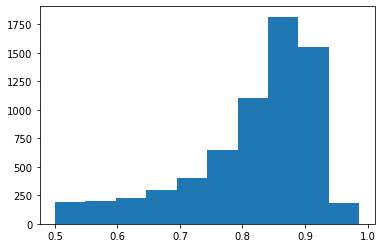

In [72]:
plt.hist(df['max']);

In [73]:
x_train_np = x_train.to_numpy()
unl_np = unl.to_numpy()
y_train_np = y_train.to_numpy()

In [74]:
st = time.time()

nc =np.arange(.40, 1, .03)
acc = np.empty(20)
i = 0
for k in np.nditer(nc):
    conf_ind = df['max'] > k
    X_train1 = np.append(x_train_np, unl_np[conf_ind, :], axis=0)
    Y_train1 = np.append(y_train_np, df.loc[conf_ind, ['lab']])
    clf = svm.SVC(kernel='linear', probability= True, C=1).fit(X_train1, Y_train1)
    acc[i] = clf.score(x_test, y_test)
    i = i + 1
    
elapsed_time = time.time() - st
print('Execution time:', time.strftime("%H:%M:%S", time.gmtime(elapsed_time)))

Execution time: 01:05:38


Here you can see, It took around 1:05 min just to run 10,000 data which we decreased from the original 92,000 dataset.

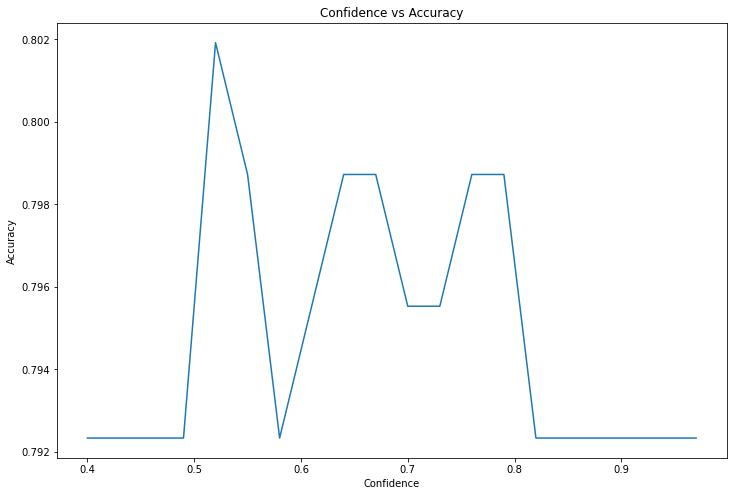

In [75]:
plt.figure(figsize=(12,8))
x = pd.Series(acc, index = nc)
x.plot()

#adding title and axis name
plt.title ("Confidence vs Accuracy")
plt.xlabel('Confidence')
plt.ylabel('Accuracy')
plt.show()

In [76]:
acc

array([0.79233227, 0.79233227, 0.79233227, 0.79233227, 0.80191693,
       0.79872204, 0.79233227, 0.79552716, 0.79872204, 0.79872204,
       0.79552716, 0.79552716, 0.79872204, 0.79872204, 0.79233227,
       0.79233227, 0.79233227, 0.79233227, 0.79233227, 0.79233227])

In [77]:
acc.mean()

0.7948881789137381

The final accuracy of semi-supervised is `80%` while the accuracy of classification is `79%`. There's a `1%` increase in output accuracy between semi-supervised and classification, which can mean a lot in healthcare domain.